# COURSE: Master math by coding in Python
## SECTION: Calculus

#### https://www.udemy.com/course/math-with-python/?couponCode=MXC-DISC4ALL
#### INSTRUCTOR: sincxpress.com

Note about this code: Each video in this section of the course corresponds to a section of code below. Please note that this code roughly matches the code shown in the live recording, but is not exactly the same -- the variable names, order of lines, and parameters may be slightly different. 

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from IPython.display import display,Math

# VIDEO: Computing limits of a function

In [36]:
x = sym.symbols('x')

# the function
fx = x**3

# limit
lim_pnt = 1.5
lim = sym.limit(fx,x,lim_pnt)

display(Math('\\lim_{x\\to %g} %s = %g' %(lim_pnt,sym.latex(fx),lim)))

<IPython.core.display.Math object>

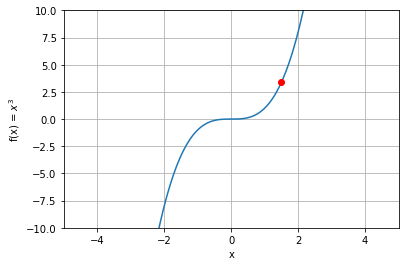

In [37]:
# evaluate the function in a range
xx = np.linspace(-5,5,200)
fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function

# show it in a plot
plt.plot(xx,fxx(xx))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([-5,5])
plt.ylim([-10,10])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(fx))
plt.grid()
plt.show()


<IPython.core.display.Math object>

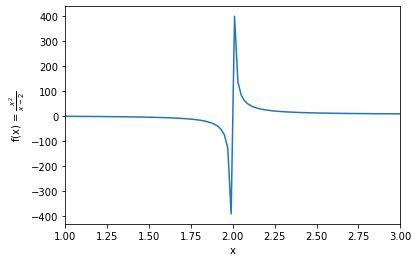

In [38]:
# the function
fx = (x**2)/(x-2)
fxx = sym.lambdify(x,fx) # a function for evaluating a sympy function


xx = np.linspace(1,3,100)

# limit
lim_pnt = 2
lim = sym.limit(fx,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %g' %(lim_pnt,sym.latex(fx),lim)))

# show it in a plot
plt.plot(xx,fxx(xx))

# make the plot look a bit nicer
plt.plot(lim_pnt,lim,'ro')
plt.xlim([1,3])
plt.xlabel('x')
plt.ylabel('f(x) = $%s$' %sym.latex(fx))

plt.show()

### Exercise

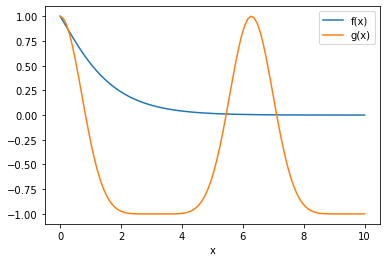

In [39]:
fx = sym.sqrt(x+1)*sym.exp(-x)
gx = sym.cos(x + sym.sin(x))

## start by plotting the functions
fxx = sym.lambdify(x,fx)
gxx = sym.lambdify(x,gx)

xx = np.linspace(0,10,100)

# show it in a plot
plt.plot(xx,fxx(xx),label='f(x)')
plt.plot(xx,gxx(xx),label='g(x)')

# make the plot look a bit nicer
plt.xlabel('x')
plt.legend()

plt.show()

In [40]:
# compute the limits separately at x=5
lim_pnt = 5
lim_fx = sym.limit(fx,x,lim_pnt)
lim_gx = sym.limit(gx,x,lim_pnt)

display(Math('\\frac{\\lim_{x\\to %g} f(x)}{\\lim_{x\\to %g} g(x)} = \\frac{%g}{%g} = %g' \
             %(lim_pnt,lim_pnt,lim_fx,lim_gx,lim_fx/lim_gx)))

# now compute limit of fx/gx
lim_fg = sym.limit(fx/gx,x,lim_pnt)

display(Math('\\lim_{x\\to %g} \\frac{f(x)}{g(x)} = %g' %(lim_pnt,lim_fg)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Piece-wise functions

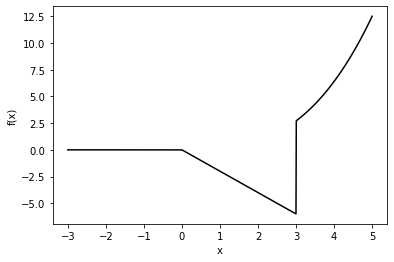

In [41]:
# list function pieces
from sympy.abc import x

piece1= 0
piece2= -2*x
piece3= x**3/10

# put them together with conditions
fx= sym.Piecewise( 
    (piece1, x<0),
    (piece2, (x>=0) & (x<3)),
    (piece3, x>=3) )

# evaluate the function in a range
xx=  np.linspace(-3, 5, 1000)
fxx= sym.lambdify(x, fx)

# show it in a plot
plt.plot(xx, fxx(xx), 'k')

# make the plot look a bit nicer
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

### Exercise

<IPython.core.display.Math object>

<lambdifygenerated-38>:2: RuntimeWarning: invalid value encountered in log
  return (select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan))


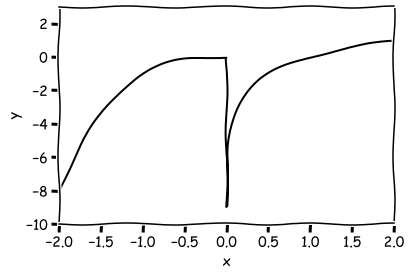

In [42]:
# function pieces
x = sym.symbols('x')

f = x**3
g = sym.log(x,2)

fx = sym.Piecewise( (f,x<=0),(g,x>0) )

# print out the function definition
display(Math('f(x) = ' + sym.latex(fx)))


# evaluate the function in a range
xx = np.linspace(-2,2,1000)
fxx = sym.lambdify(x,fx)

# show it in a plot
with plt.xkcd():
    plt.plot(xx,fxx(xx),'k')

# make the plot look a bit nicer
plt.xlim([-2,2])
plt.ylim([-10,3])
plt.xlabel('x')
plt.ylabel('y')

plt.show()


# VIDEO: Derivatives of polynomials

In [43]:
x = sym.symbols('x')

fx = x**2

sym.diff(fx)

2*x

In [44]:
# Leibniz notation
display(Math('f(x) = %s, \\quad \\frac{df}{dx} = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Lagrange notation
display(Math('f(x) = %s, \\quad f\' = %s' %(sym.latex(fx),sym.latex(sym.diff(fx)))))

# Newton notation
display(Math('f(x) = %s, \\quad \\ddot{f} = %s' %(sym.latex(fx),sym.latex(sym.diff(sym.diff(fx))))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

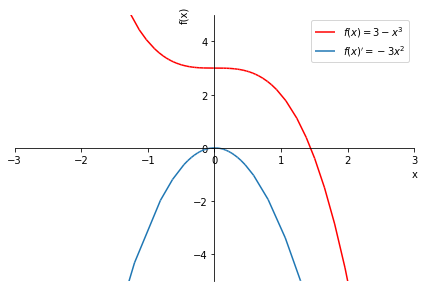

In [45]:
import sympy.plotting.plot as symplot

# plot

fx = (3-x**3)

# generate the first plot
p = symplot(fx,(x,-5,5),show=False)
p[0].label = '$f(x) = %s$' %sym.latex(fx) # create a label for the legend

# extend to show the second plot as well
p.extend( symplot(sym.diff(fx),show=False) )
p[1].label = '$f(x)\' = %s$' %sym.latex(sym.diff(fx))

# some plotting adjustments
p.ylim = [-5,5]
p.xlim = [-3,3]
p[0].line_color = 'r'
p.legend = True # activate the legend

# and show the plot
p.show()


### Exercise

In [46]:
f = 3 + 2*x - 5*x**2 + 7*x**4
g = 4*x**2 + x**5

df = sym.diff(f)
dg = sym.diff(g)

d_f_times_g = sym.diff(f*g)
df_times_dg = sym.diff(f) * sym.diff(g)


display(Math('\\text{Without applying the product rule:}'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_f_times_g))))
display(Math('\\quad f\' \\times g\' = %s' %sym.latex(sym.expand(df_times_dg))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
# apply the product rule
display(Math('\\text{With the product rule: }'))
display(Math('\\quad (f\\times g)\' = %s' %sym.latex(sym.expand(d_f_times_g))))
display(Math('\\quad f\'\\times g+f\\times g\' = %s' %sym.latex(sym.expand(df*g+f*dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
# try again for addition
dfPlusg  = sym.diff(f+g)

display(Math('(f+ g)\' = %s' %sym.latex(sym.expand(dfPlusg))))
display(Math('f\' + g\' = %s' %sym.latex(sym.expand(df+dg))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Derivatives of trig functions

In [49]:
q = sym.symbols('q')

print(sym.diff( sym.cos(q) ))
print(sym.diff( sym.sin(q) ))

-sin(q)
cos(q)


In [50]:
# show the cyclicity of sin/cos derivatives
f = sym.cos(x)

for i in range(0,8):
    display(Math('\\frac{d}{dx}%s = %s' %(sym.latex(f),sym.latex(sym.diff(f)))))
    f = sym.diff(f)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

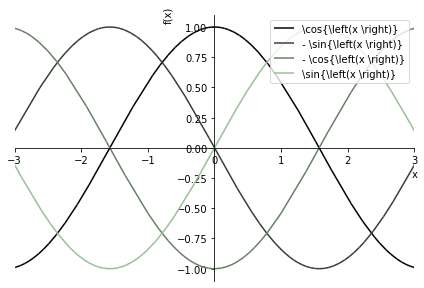

In [51]:
import sympy.plotting.plot as symplot

f = sym.cos(x)

for i in range(0,4):
    if i==0:
        p = symplot(f,show=False,line_color=(i/5,i/4,i/5),label=sym.latex(f))
    else:
        p.extend( symplot(f,show=False,line_color=(i/5,i/4,i/5),label=sym.latex(f)) )
    f = sym.diff(f)
    
p.legend = True
p.xlim = [-3,3]
p.show()

### Exercise

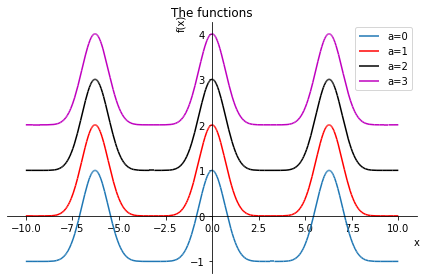

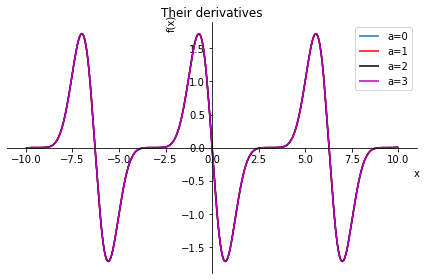

In [52]:
a = sym.symbols('a')

f = sym.cos(x + sym.sin(x)) + a

colors = 'brkm'


for ai in range(0,4):
    if ai==0:
        p = symplot(f.subs(a,ai),show=False,label='a=%s' %ai)
    else:
        p.extend( symplot(f.subs(a,ai),line_color=colors[ai],show=False,label='a=%s' %ai) )

p.title = 'The functions'
p.legend = True
p.show()


for ai in range(0,4):
    if ai==0:
        p = symplot(sym.diff(f.subs(a,ai)),show=False,label='a=%s' %ai)
    else:
        p.extend( symplot(sym.diff(f.subs(a,ai)),line_color=colors[ai],show=False,label='a=%s' %ai) )

p.title = 'Their derivatives'
p.legend = True
p.show()

# VIDEO: Graphing a function tangent line

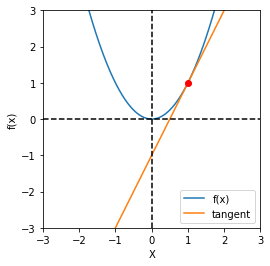

In [53]:
x = sym.symbols('x')

# define function and its derivative
f = x**2
df = sym.diff(f)

# select x point
xa = 1

# define function and derivative values at that point
fa = f.subs(x,xa)
df_a = df.subs(x,xa)

## evaluate function and its derivative
xx     = np.linspace(-2,2,200)
f_fun  = sym.lambdify(x,f)(xx)
df_fun = sym.lambdify(x,df)(xx)

# compute the tangent line
tanline = df_a * (xx - xa) + fa

# plot it!
plt.plot(xx,f_fun,label='f(x)')
plt.plot(xx,tanline,label='tangent')
plt.plot(xa,fa,'ro')

plt.axis('square')
plt.axis([-3,3,-3,3])
ax = plt.gca()
plt.plot(ax.get_xlim(),[0,0],'k--')
plt.plot([0,0],ax.get_xlim(),'k--')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.legend()

plt.show()

### Exercise

In [54]:
# make a function that computes the tangent line, loop through lots of points

def computetangent(f,xa,bnds):
    # define function and derivative values at that point
    df = sym.diff(f)
    fa = f.subs(x,xa)
    df_a = df.subs(x,xa)

    # evaluate the tangent line
    xx = np.linspace(bnds[0],bnds[1],200)
    return df_a * (xx - xa) + fa

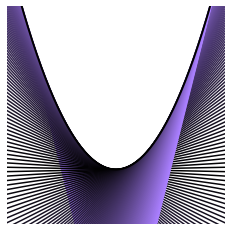

In [55]:
x = sym.symbols('x')
f = x**2
xx = np.linspace(-2,2,200)
f_fun  = sym.lambdify(x,f)(xx)


for i in xx:
    yy = computetangent(f,i,xx[[0,-1]])
    plt.plot(xx,yy,color=[abs(i)/3,abs(i)/4,abs(i)/2])


# plot it!
plt.plot(xx,f_fun,'k',linewidth=2)

plt.axis('square')
plt.axis([-2,2,-1,3])
plt.axis('off')
plt.show()

# VIDEO: Finding critical points of a function

The critical points are [-0.995996  0.995996] [-0.00500501]


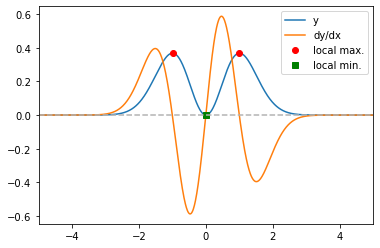

In [56]:
# The empirical method (useful for df=0; won't work for non-differentiable points)

# create a function
x = np.linspace(-5,5,1000) # vs 1001
fx = x**2 * np.exp(-x**2)

# extrema
localmax = find_peaks(fx)[0]
localmin = find_peaks(-fx)[0]
print('The critical points are ' + str(x[localmax]) + ' ' + str(x[localmin]))

# compute its derivative
dfx = np.diff(fx)/np.mean(np.diff(x)) # scale by dx!

# plot everything
plt.plot(x,fx,label='y')
plt.plot(x[0:-1],dfx,label='dy/dx')
plt.plot(x[localmax],fx[localmax],'ro',label='local max.')
plt.plot(x[localmin],fx[localmin],'gs',label='local min.')
plt.plot(x[[0,-1]],[0,0],'--',c=[.7,.7,.7])

plt.legend()
plt.xlim(x[[0,-1]])
plt.show()

The critical points are: [-1, 0, 1]


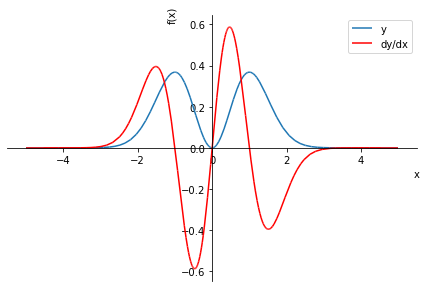

In [2]:
# The analytic (symbolic) method

x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)

# derivative in sympy, solve
dfx = sym.diff(fx,x)
critpoints = sym.solve(dfx)
print('The critical points are: ' + str(critpoints))


# some sympy plotting
p = sym.plot(fx,(x,-5,5),show=False)
p.extend( sym.plot(dfx,(x,-5,5),show=False,line_color='r') )

p[0].label = 'y'
p[1].label = 'dy/dx'
p.legend = True
p.show()

### Exercise

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

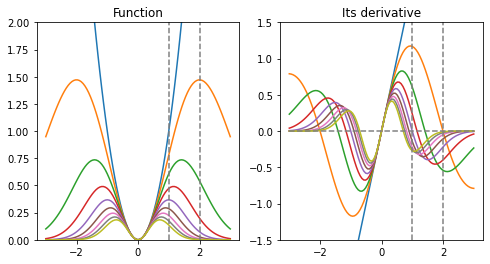

In [58]:
# what values of 'a' give this function a critical point at x=1 or x=2?
a,x = sym.symbols('a,x')

baseexpr = x**2 * sym.exp(-a*x**2)
arange = np.arange(0,2.25,.25)
xrange = np.linspace(-3,3,100)

# setup plots
fig,ax = plt.subplots(1,2)

for ai in arange:
    
    fx = baseexpr.subs(a,ai)
    dfx = sym.diff(fx)
    critpnts = sym.solve( dfx )
    
    # also plot the function in subplot1 and its derivative in subplot2
    ax[0].plot(xrange,sym.lambdify(x,fx)(xrange))
    ax[1].plot(xrange,sym.lambdify(x,dfx)(xrange))
    
    
    if 1 in critpnts:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=1! Woohoo!!}' %sym.latex(fx)))
    elif 2 in critpnts:
        display(Math('\\Rightarrow %s\\text{ has a critical point at x=2! Woohoo!!}' %sym.latex(fx)))
    else:
        display(Math('\\quad %s\\text{ has NO critical point at x=2. :(}' %sym.latex(fx)))



# some adjustments to the function plot
ax[0].set_ylim([0,2])
ax[0].set_title('Function')
ax[0].plot([1,1],[0,2],'--',c='gray')
ax[0].plot([2,2],[0,2],'--',c='gray')

# adjustments to the derivative plot
ax[1].set_ylim([-1.5,1.5])
ax[1].plot(xrange[[0,-1]],[0,0],'--',c='gray')
ax[1].plot([1,1],[-1.5,1.5],'--',c='gray')
ax[1].plot([2,2],[-1.5,1.5],'--',c='gray')
# ax[1].set_xlim([.5,2.5])
ax[1].set_title('Its derivative')
fig.set_size_inches(8,4)

plt.show()

# VIDEO: Partial derivatives

In [4]:
from sympy.abc import x,y

f = x**2 + x*y**2

display(Math('\\frac{\\partial f}{\\partial x} = %s' %sym.latex(sym.diff(f,x))))
display(Math('\\frac{\\partial f}{\\partial y} = %s' %sym.latex(sym.diff(f,y))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Exercise

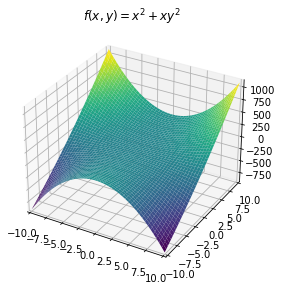

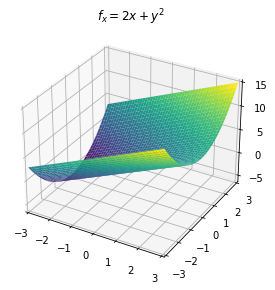

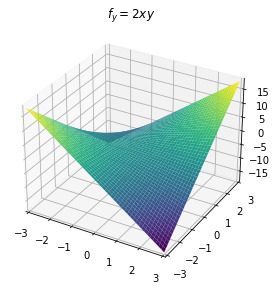

In [5]:
p = sym.plotting.plot3d(f,(x,-3,3),title='$f(x,y)=%s$' %sym.latex(f))
p = sym.plotting.plot3d(sym.diff(f,x),(x,-3,3),(y,-3,3),title='$f_x=%s$' %sym.latex(sym.diff(f,x)))
p = sym.plotting.plot3d(sym.diff(f,y),(x,-3,3),(y,-3,3),title='$f_y=%s$' %sym.latex(sym.diff(f,y)))

# VIDEO: Indefinite and definite integrals

In [6]:
x = sym.symbols('x')

# a simple function
f = x

# indefinite integration
sym.integrate(f) # notice no constant term

x**2/2

In [7]:
# definite integation (within bounds)
sym.integrate(f,(x,0,1))

1/2

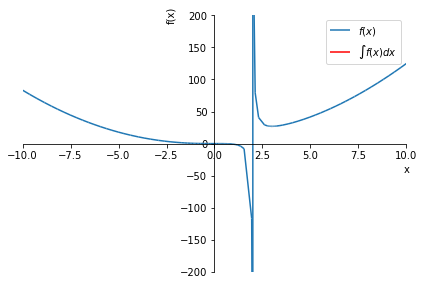

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
# plotting...

lowbnd = 2 # add later

f = x**3 / (x-lowbnd)
intf = sym.integrate(f)
p = sym.plotting.plot(f,show=False)
p.extend( sym.plotting.plot(intf,(x,-10,0),show=False,line_color='r') )

p.xlim = [-10,10]
p.ylim = [-200,200]

p[0].label = '$f(x)$'
p[1].label = '$\\int f(x)dx$'
p.legend = True
p.show()

display(Math('f(x) = %s' %sym.latex(f)))
display(Math('\\int f(x) dx = %s' %sym.latex(intf)))

### Exercise

In [9]:
# show that the antiderivative (indefinite integral) of the derivative is the original function

f = 2*x**3 + sym.sin(x)

df = sym.diff(f)
idf = sym.integrate(df)

display(Math('f(x)=%s' %sym.latex(f)))
display(Math('f\'=%s' %sym.latex(df)))
display(Math('\\int (f\')dx=%s' %sym.latex(idf)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Area between two curves

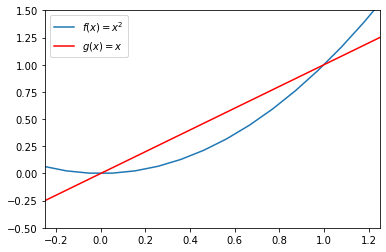

In [10]:
x = sym.symbols('x')

symf = x**2
symg = x

f = sym.lambdify(x,symf)
g = sym.lambdify(x,symg)

xx = np.linspace(-2,2,40)

plt.plot(xx,f(xx))
plt.plot(xx,g(xx),'r')

plt.legend(['$f(x)=%s$'%sym.latex(symf),'$g(x)=%s$'%sym.latex(symg)])
plt.axis([-.25,1.25,-.5,1.5])
plt.show()

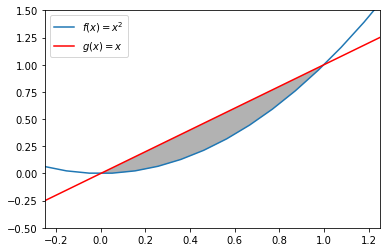

In [11]:
from matplotlib.patches import Polygon

xinter = np.linspace(0,1,100)
points = np.vstack((g(xinter),f(xinter))).T
p = Polygon(points,facecolor='k',alpha=.3)

fig, ax = plt.subplots()
ax.add_patch(p)


plt.plot(xx,f(xx))
plt.plot(xx,g(xx),'r')

plt.legend(['$f(x)=%s$'%sym.latex(symf),'$g(x)=%s$'%sym.latex(symg)])
plt.axis([-.25,1.25,-.5,1.5])
plt.show()

### Exercise

### Computing the area between two functions
The area between two functions is given by the formula $A = \int_{a}^{b}f(x) - g(x) dx$

In our example, $f(x)=x^2$ and $g(x)=x$

Therefore, $A = \int_{a}^{b}(x^2 - x) dx$

We will compute the area between the two crossing points, that is, where the two functions are equal. This is given by the two solutions to the equation
$$x^2=x$$

The two solutions are $x=0$ and $x=1$. This gives us the definite integral of
$$A = \int_{0}^{1}(x^2 - x) dx$$

The final answer will be given in the code below.

In [12]:
# find intersection points
fg_intersect = sym.solve(symf-symg)
display(Math('f(x)\\text{ and }g(x) \\text{ intersect at } x=%s,%s' %(fg_intersect[0],fg_intersect[1])))

# compute area and print results!
A = sym.integrate(symf-symg,(x,fg_intersect[0],fg_intersect[1]))
display(Math('\\text{The area between the functions is } A = %s' %A))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# VIDEO: Calculus BUG HUNT!!

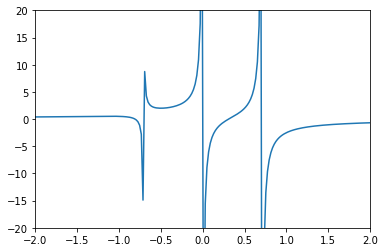

In [13]:
# evaluate a function in a range
from sympy.abc import x

fx = (4*x**3 + 2*x**2 - x) / (-4*x**4 + 2*x**2)

xrange = np.linspace(-2,2,200)
fxx = sym.lambdify(x,fx)

plt.plot(xrange,fxx(xrange))
plt.ylim([-20,20])
plt.xlim(xrange[[0,-1]])
plt.show()

<IPython.core.display.Math object>

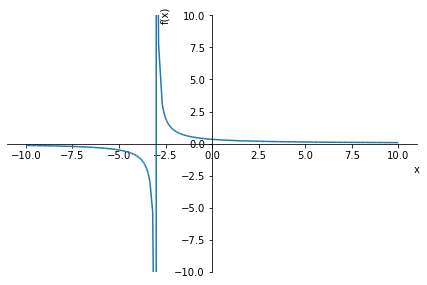

In [14]:
# compute the limit
x = sym.symbols('x')
fx = 1/(x+3)

lim_pnt = -3
lim = sym.limit(fx,x,lim_pnt,dir='+')

display(Math('\\lim_{x\\to %g^+} %s = %s' %(lim_pnt,sym.latex(fx),sym.latex(lim))))
p = sym.plotting.plot(fx,show=False)
p.ylim = [-10,10]
p.show()

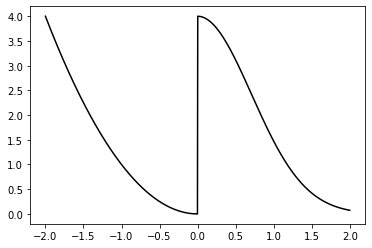

In [15]:
# piece-wise function
from sympy.abc import x

piece1 = x**2
piece2 = 4*sym.exp(-x**2)

# put them together with conditions
fx = sym.Piecewise( (piece1,x<0) , (piece2,x>=0) )

# evaluate the function in a range
xx = np.linspace(-2,2,1000)
fxx = sym.lambdify(x,fx)

# show it in a plot
plt.plot(xx,fxx(xx),'k')

plt.show()

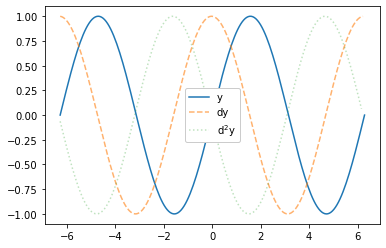

In [16]:
# show the first and second derivatives of sin(x)
x = np.linspace(-2*np.pi,2*np.pi,200)
dt = np.diff(x[0:2])

y = np.sin(x)
dy = np.diff(y)
ddy = np.diff(y,2)

plt.plot(x,y,label='y')
plt.plot(x[0:-1],dy/dt,'--',label='dy',alpha=.6)
plt.plot(x[0:-2],ddy/dt**2,':',label='d$^2$y',alpha=.3)

plt.legend(framealpha=1)
plt.show()

The critical points are: [-1, 0, 1]


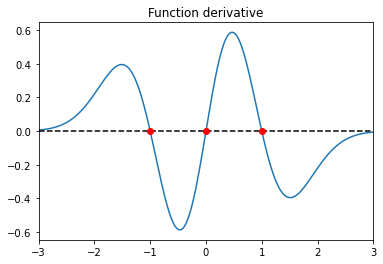

In [17]:
# Compute critical points using sympy

x = sym.symbols('x')
fx = x**2 * sym.exp(-x**2)

# derivative in sympy, solve
dfx = sym.diff(fx,x)
critpoints = sym.solve(dfx)
print('The critical points are: ' + str(critpoints))


# plot the function derivative and its critical points
y = sym.lambdify(x,dfx)
xx = np.linspace(-3,3,200)

plt.plot(xx,y(xx))
plt.plot([-3,3],[0,0],'k--')
plt.xlim([-3,3])

for i in critpoints:
    plt.plot(i,0,'ro')

plt.title('Function derivative')
plt.show()

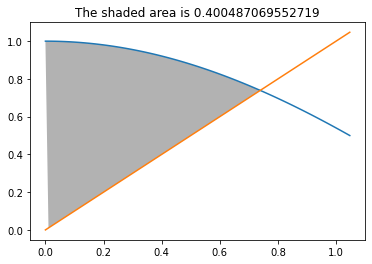

In [18]:
# Compute the area between two curves (not the same thing as Between Two Ferns)
from matplotlib.patches import Polygon


x = sym.symbols('x')
f1sym = sym.cos(x)
f2sym = x

xx = np.linspace(0,np.pi/3,100)
f1 = np.cos(xx)
f2 = xx

fintersect = np.argmin(abs(f1-f2))

# compute area
A = sym.integrate(f1sym-f2sym,(x,xx[0],xx[fintersect]))

traceX = np.concatenate((xx[0:fintersect],xx[fintersect:0:-1]))
traceY = np.concatenate((f1[0:fintersect],f2[fintersect:0:-1]))

points = np.vstack((traceX,traceY)).T
p = Polygon(points,facecolor='k',alpha=.3)

fig, ax = plt.subplots()
ax.add_patch(p)

plt.plot(xx,f1, xx,f2)
plt.title('The shaded area is %s' %A)
plt.show()
